In [41]:
include("chern.jl")

Main.chern

# With 4d legs

In [42]:
nqs = 4:4:20
results = chern.testberry(3, 0.02, nqs)

Finished nq = 4. Chern number is -1.04112092483019e-14
Finished nq = 8. Chern number is -0.5016263449025121
Finished nq = 12. Chern number is -234.9886100806715


LoadError: InterruptException:

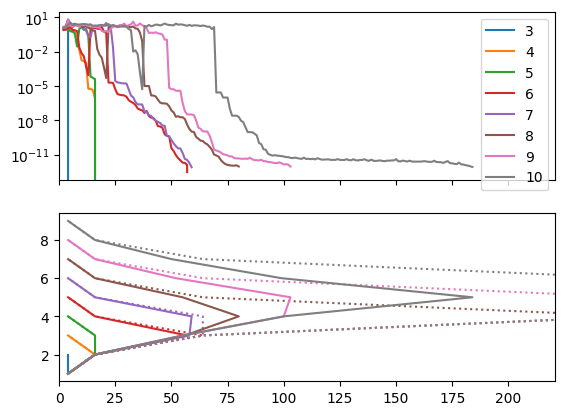

PyObject <matplotlib.legend.Legend object at 0x17e9d6970>

In [ ]:
fig, axs = subplots(nrows=2, sharex=true)
for r in results
    nq = r.nq
    axs[1].semilogy(r.ranks, r.errors, label="$nq")
    line = axs[2].plot([min(4^i, 4^(nq - i)) for i in 1:(nq-1)], 1:nq-1, ":")
    axs[2].plot([size(T, 3) for T in r.qtt[1:nq-1]], 1:nq-1, color=line[1].get_color())

    axs[1].set_xlim(0, 1.2 * maximum(r.ranks))
    axs[2].set_xlim(0, 1.2 * maximum(r.ranks))
end
axs[1].legend()

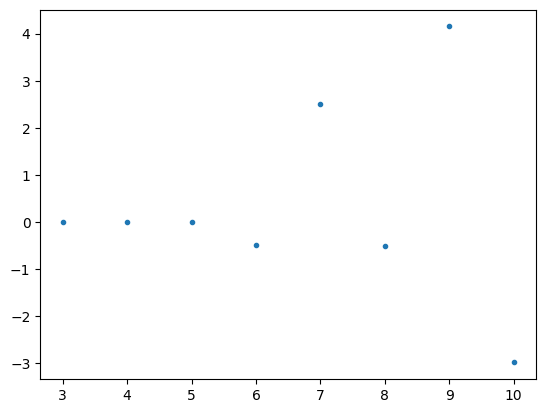

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x29c787670>

In [ ]:
plot([r.nq for r in results], [r.chernnumber for r in results], ".")

# With 2 * 2d legs

In [38]:
nqs = 3:10
results = chern.testberry(3, 0.02, nqs)

Finished nq = 3. Chern number is 1.6468832733604554e-13
Finished nq = 4. Chern number is 6.400250896573445e-11
Finished nq = 5. Chern number is -9.700546851682436e-10
Finished nq = 6. Chern number is -0.5000000079942515
Finished nq = 7. Chern number is 2.499941025510311
Finished nq = 8. Chern number is -0.5002477372169766
Finished nq = 9. Chern number is -3.325044544665916e7
Finished nq = 10. Chern number is 1.692770338311592e8


8-element Vector{Main.chern.BerryResult}:
 Main.chern.BerryResult(3, 1.6468832733604554e-13, [[1.0000000000000002 -7.888609052210118e-31;;; 5.972857559957629e-13 0.9999999999999998], [1.0000000000000024 -5.220081394071394e-18; 3.0997123135800293e-17 2.579748190739507e-19;;; 4.685679145164536e-15 1.0; 5.827327557937338e-17 7.155626506250849e-19;;; -4.200766163647578e-17 2.9311269265615622e-18; -8.110787709339259e-17 0.9999999999999998;;; 8.132943905254404e-17 2.3055141131118717e-16; 1.0 -1.3471115667094881e-16], [1.0000000000000004 2.86626859002147e-19; -2.695771264590375e-17 -1.4661020956091106e-19; -1.707715465159057e-16 5.489118422382651e-17; 2.091677792221572e-16 -7.140457433290208e-17;;; -1.3772646618750875e-10 1.0000000000000695; 2.9737885366388423e-12 5.5942820712905985e-14; 6.906646160471477e-11 2.7076045833657106e-15; -1.361455433351161e-10 8.907566336248867e-17;;; 1.7564092651875904e-17 1.5289663258685805e-18; 1.0000000000000004 2.9754690764984593e-19; 1.5424626892194162e-16 -

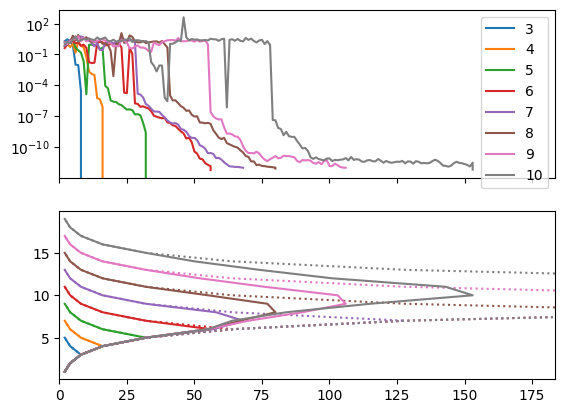

PyObject <matplotlib.legend.Legend object at 0x29d818f10>

In [39]:
fig, axs = subplots(nrows=2, sharex=true)
for r in results
    nq = r.nq
    axs[1].semilogy(r.ranks, r.errors, label="$nq")
    line = axs[2].plot([min(2^i, 2^(2nq - i)) for i in 1:(2nq-1)], 1:(2nq-1), ":")
    axs[2].plot([size(T, 3) for T in r.qtt[1:2nq-1]], 1:(2nq-1), color=line[1].get_color())

    axs[1].set_xlim(0, 1.2 * maximum(r.ranks))
    axs[2].set_xlim(0, 1.2 * maximum(r.ranks))
end
axs[1].legend()

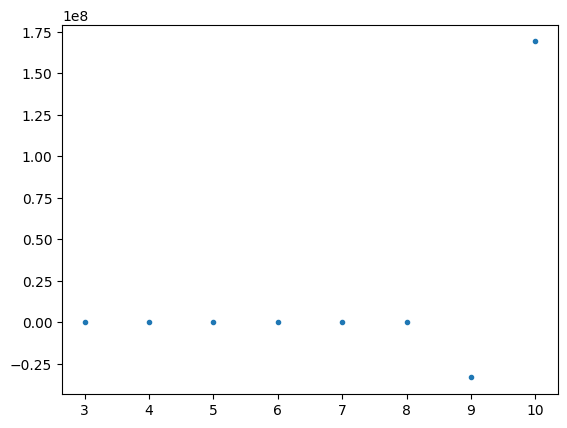

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x29d935a90>

In [40]:
plot([r.nq for r in results], [r.chernnumber for r in results], ".")